# Connecting to Database

In [3]:
#connect to database

from dejavu import Dejavu

config = {
    "database_type": "mysql",
    "database": {
        "host": "127.0.0.1",
        "user": "root",
        "password": "CookieYumYum", 
        "database": "dejavu",
    }
}

djv = Dejavu(config)

# Fingerprinting Household Sanitation Sounds

In [4]:
#fingerprinting_householdsanitation_directory

djv.fingerprint_directory("/Users/allegrasimmons/Desktop/Household_sounds", [".wav"], 3)

/Users/allegrasimmons/Desktop/Household_sounds/Household_Doors/Dinning_Room_Audios/Front_Door/fromdinningroom-openingfrontdoor11.wav already fingerprinted, continuing...
/Users/allegrasimmons/Desktop/Household_sounds/Household_Doors/Dinning_Room_Audios/Front_Door/fromdinningroom-openingfrontdoor10.wav already fingerprinted, continuing...
/Users/allegrasimmons/Desktop/Household_sounds/Household_Doors/Dinning_Room_Audios/Front_Door/fromdinningroom-openingfrontdoor12.wav already fingerprinted, continuing...
/Users/allegrasimmons/Desktop/Household_sounds/Household_Doors/Dinning_Room_Audios/Front_Door/fromdinningroom-openingfrontdoor13.wav already fingerprinted, continuing...
/Users/allegrasimmons/Desktop/Household_sounds/Household_Doors/Dinning_Room_Audios/Front_Door/fromdinningroom-openingfrontdoor14.wav already fingerprinted, continuing...
/Users/allegrasimmons/Desktop/Household_sounds/Household_Doors/Dinning_Room_Audios/Front_Door/fromdinningroom-openingfrontdoor15.wav already fingerpri

# Unknown File Recognizer 


In [5]:
#nowtryingtorecongizenotfingerprintedaudios

from dejavu.logic.recognizer.file_recognizer import FileRecognizer
recognizer = FileRecognizer(djv)

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Testing Audios

# Disposal - Dining Room

In [10]:
fromdinningroomdisposal_audio1 = djv.recognize(FileRecognizer, "/Users/allegrasimmons/Desktop/Household_Sounds_test/disposal_diningroom1_test2.wav")
fromdinningroomdisposal_audio1

{'total_time': 0.0994720458984375,
 'fingerprint_time': 0.057863712310791016,
 'query_time': 0.025142908096313477,
 'align_time': 0.016373157501220703,
 'results': [{'song_id': 99,
   'song_name': b'7-nathaniel-walkingbarefootinhallway',
   'input_total_hashes': 120,
   'fingerprinted_hashes_in_db': 34,
   'hashes_matched_in_input': 3,
   'input_confidence': 0.03,
   'fingerprinted_confidence': 0.09,
   'offset': -60,
   'offset_seconds': -2.78639,
   'file_sha1': b'9FF9CB97282055870D8DBB779BD5E750026291CC'},
  {'song_id': 231,
   'song_name': b'fromdiningroom-washer1',
   'input_total_hashes': 120,
   'fingerprinted_hashes_in_db': 991,
   'hashes_matched_in_input': 12,
   'input_confidence': 0.1,
   'fingerprinted_confidence': 0.01,
   'offset': 1072,
   'offset_seconds': 49.78358,
   'file_sha1': b'F62865F9C8F21FC60A58AC88FC66E1FD66C8E435'}]}

# Disposal - Living Room

In [9]:
fromdinningroomdisposal_audio2 = djv.recognize(FileRecognizer, "/Users/allegrasimmons/Desktop/Household_Sounds_test/disposal_livingroom3tr5.wav")
fromdinningroomdisposal_audio2

{'total_time': 0.09507179260253906,
 'fingerprint_time': 0.05327272415161133,
 'query_time': 0.029697895050048828,
 'align_time': 0.011991024017333984,
 'results': [{'song_id': 263,
   'song_name': b'disposal_livingroom1tr2',
   'input_total_hashes': 256,
   'fingerprinted_hashes_in_db': 229,
   'hashes_matched_in_input': 10,
   'input_confidence': 0.04,
   'fingerprinted_confidence': 0.04,
   'offset': 37,
   'offset_seconds': 1.71828,
   'file_sha1': b'B9D361B3261B32371514BEA5FF194BE90866D938'},
  {'song_id': 264,
   'song_name': b'disposal_livingroom3tr3real',
   'input_total_hashes': 256,
   'fingerprinted_hashes_in_db': 277,
   'hashes_matched_in_input': 10,
   'input_confidence': 0.04,
   'fingerprinted_confidence': 0.04,
   'offset': -9,
   'offset_seconds': -0.41796,
   'file_sha1': b'F5C39F1A45A074220B24E4DF79A0308A604C85D5'}]}

## Matching Accuracy 

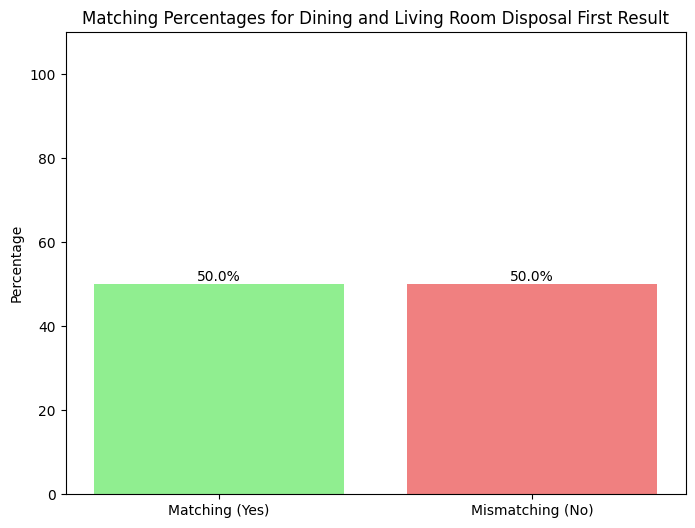

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

disposal_list = [
    {'Audio': 'Disposal Dining Room', 'First': 'no', 'Second': 'no'},
    {'Audio': 'Disposal Living Room', 'First': 'yes', 'Second': 'yes'}
]

disposal = pd.DataFrame(disposal_list)

# Calculate the matching percentage
matching_percentage = (disposal['First'] == 'yes').sum() / len(disposal) * 100
mismatching_percentage = 100 - matching_percentage

# Create a bar chart for matching percentages
categories = ['Matching (Yes)', 'Mismatching (No)']
percentages = [matching_percentage, mismatching_percentage]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=colors)
plt.ylabel('Percentage')
plt.title('Matching Percentages for Dining and Living Room Disposal First Result')

# Add labels to the bars
for i, percentage in enumerate(percentages):
    plt.annotate(f'{percentage:.1f}%', (i, percentage), ha='center', va='bottom')

plt.ylim(0, 110)  # Set the y-axis limit from 0% to 100%

plt.show()


## Confidence in Match - Disposal Living Room

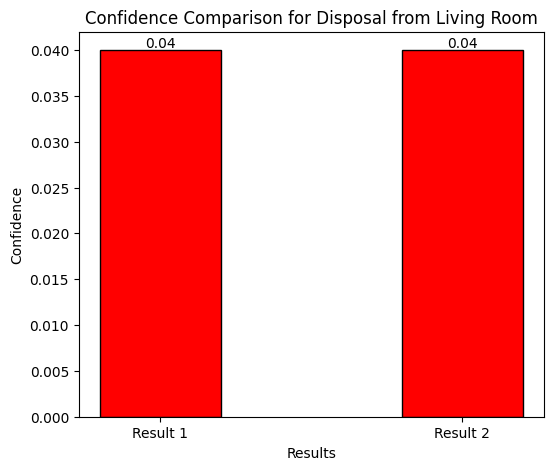

In [22]:
data = {'Result 1': 0.04, 'Result 2': 0.04}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Disposal from Living Room')

plt.show()

## Confidence in Match - Disposal Dining Room

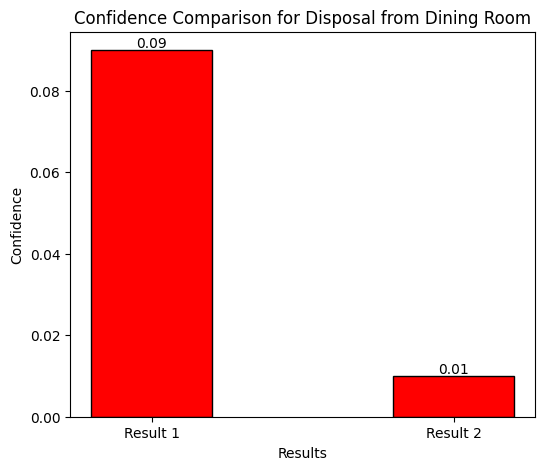

In [92]:
data = {'Result 1': 0.09, 'Result 2': 0.01}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Disposal from Dining Room')

plt.show()

## Confidence in Match - Disposal

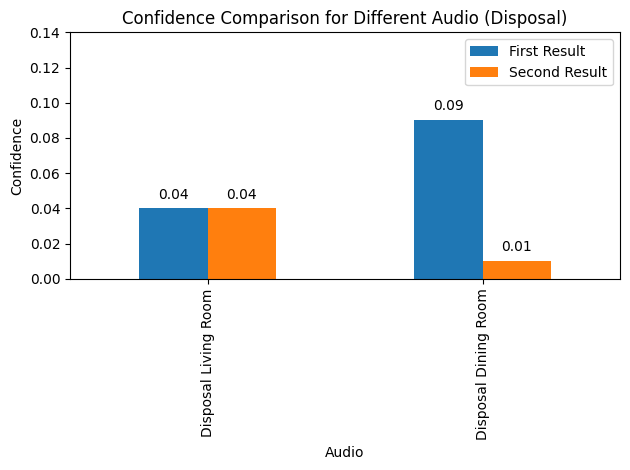

In [16]:
disposal_confidence = [
    {'Audio': 'Disposal Living Room', 'First Result': '0.04', 'Second Result': '0.04'},
    {'Audio': 'Disposal Dining Room', 'First Result': '0.09', 'Second Result': '0.01'}
]

disposal_confidence = pd.DataFrame(disposal_confidence)

# Convert the confidence columns to numeric
disposal_confidence['First Result'] = pd.to_numeric(disposal_confidence['First Result'])
disposal_confidence['Second Result'] = pd.to_numeric(disposal_confidence['Second Result'])

# Set the 'Audio' column as the index
disposal_confidence.set_index('Audio', inplace=True)

# Create a bar chart
ax = disposal_confidence.plot(kind='bar')
ax.set_ylabel('Confidence')
ax.set_title('Confidence Comparison for Different Audio (Disposal)')

# Adding confidence values above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

plt.ylim(0, 0.14)

# Display the bar chart
plt.show()

# Gas Stove - Dining Room

In [18]:
fromdinningroomgasstove_audio1 = djv.recognize(FileRecognizer, "/Users/allegrasimmons/Desktop/Household_Sounds_test/gasstove_diningroom1_trimmed.wav")
fromdinningroomgasstove_audio1

{'total_time': 0.09455204010009766,
 'fingerprint_time': 0.055036067962646484,
 'query_time': 0.024838924407958984,
 'align_time': 0.014342308044433594,
 'results': [{'song_id': 295,
   'song_name': b'gasstove_diningroom1_test',
   'input_total_hashes': 159,
   'fingerprinted_hashes_in_db': 192,
   'hashes_matched_in_input': 4,
   'input_confidence': 0.03,
   'fingerprinted_confidence': 0.02,
   'offset': -45,
   'offset_seconds': -2.0898,
   'file_sha1': b'97EA7E36AE148DBBB4109DB03408A580AD646DF2'},
  {'song_id': 179,
   'song_name': b'fromdinningroom-slidingglassdoor',
   'input_total_hashes': 159,
   'fingerprinted_hashes_in_db': 3664,
   'hashes_matched_in_input': 1,
   'input_confidence': 0.01,
   'fingerprinted_confidence': 0.0,
   'offset': 1364,
   'offset_seconds': 63.34404,
   'file_sha1': b'91071259A485F51FD66CBD2BBD4BD3E8DCC692E5'}]}

# Gas Stove - Living Room

In [19]:
fromdinningroomgasstove_audio2 = djv.recognize(FileRecognizer, "/Users/allegrasimmons/Desktop/Household_Sounds_test/gasstove_livingroom1tr4.wav")
fromdinningroomgasstove_audio2

{'total_time': 0.12769722938537598,
 'fingerprint_time': 0.0678858757019043,
 'query_time': 0.041879892349243164,
 'align_time': 0.01756882667541504,
 'results': [{'song_id': 274,
   'song_name': b'gasstove_livingroom1tr1',
   'input_total_hashes': 740,
   'fingerprinted_hashes_in_db': 699,
   'hashes_matched_in_input': 17,
   'input_confidence': 0.02,
   'fingerprinted_confidence': 0.02,
   'offset': -4,
   'offset_seconds': -0.18576,
   'file_sha1': b'4C5DCBF1FEA9A357CDAB44C0791EEA3F140A1E31'},
  {'song_id': 271,
   'song_name': b'gasstove_livingroom1tr3',
   'input_total_hashes': 740,
   'fingerprinted_hashes_in_db': 739,
   'hashes_matched_in_input': 17,
   'input_confidence': 0.02,
   'fingerprinted_confidence': 0.02,
   'offset': 1,
   'offset_seconds': 0.04644,
   'file_sha1': b'3C140124AB5B16460BCEB963593AD3D858F6CA9D'}]}

## Matching Accuracy

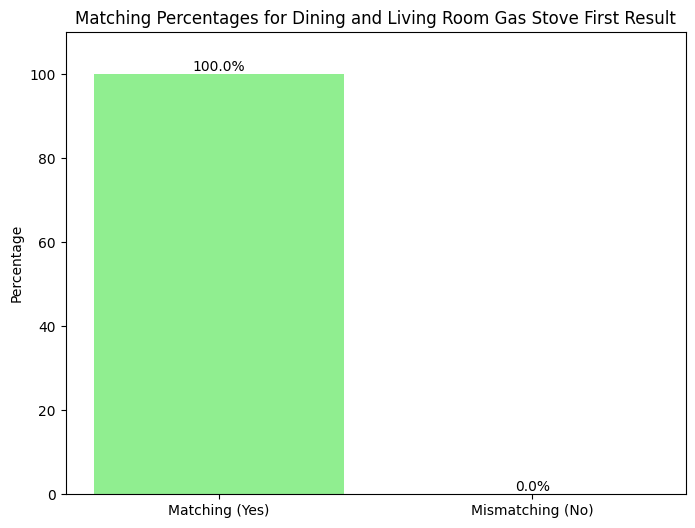

In [23]:
gasstove_list = [
    {'Audio': 'Gas Stove Dining Room', 'First': 'yes', 'Second': 'no'},
    {'Audio': 'Gas Stove Living Room', 'First': 'yes', 'Second': 'yes'}
]

gasstove = pd.DataFrame(gasstove_list)

# Calculate the matching percentage
matching_percentage = (gasstove['First'] == 'yes').sum() / len(gasstove) * 100
mismatching_percentage = 100 - matching_percentage

# Create a bar chart for matching percentages
categories = ['Matching (Yes)', 'Mismatching (No)']
percentages = [matching_percentage, mismatching_percentage]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=colors)
plt.ylabel('Percentage')
plt.title('Matching Percentages for Dining and Living Room Gas Stove First Result')

# Add labels to the bars
for i, percentage in enumerate(percentages):
    plt.annotate(f'{percentage:.1f}%', (i, percentage), ha='center', va='bottom')

plt.ylim(0, 110)  # Set the y-axis limit from 0% to 100%

plt.show()

## Confidence in Match - Gas Stove Dining Room

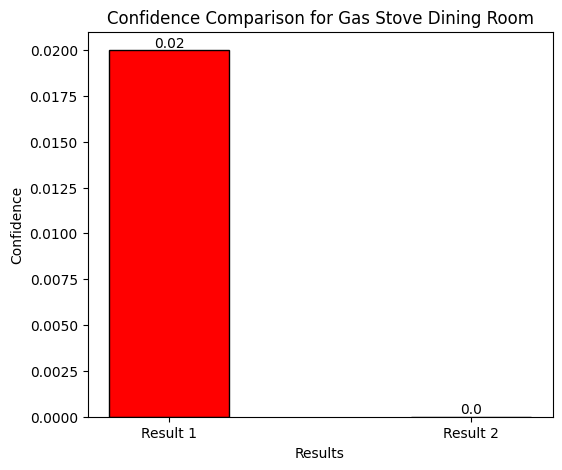

In [25]:
data = {'Result 1': 0.02, 'Result 2': 0.00}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Gas Stove Dining Room')

plt.show()

## Confidence in Match - Gas Stove Living Room

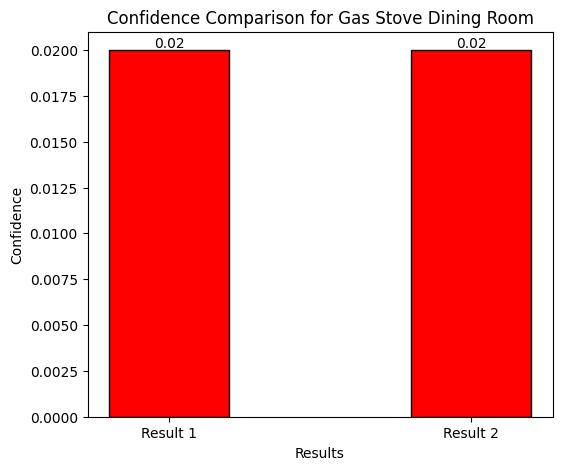

In [26]:
data = {'Result 1': 0.02, 'Result 2':  0.02}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Gas Stove Living Room')

plt.show()

## Confidence in Match - Gas Stove

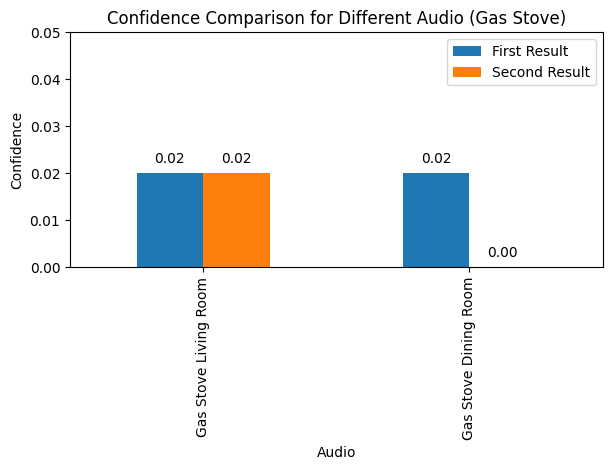

In [29]:
gasstove_confidence = [
    {'Audio': 'Gas Stove Living Room', 'First Result': '0.02', 'Second Result': '0.02'},
    {'Audio': 'Gas Stove Dining Room', 'First Result': '0.02', 'Second Result': '0.00'}
]

gasstove_confidence = pd.DataFrame(gasstove_confidence)

# Convert the confidence columns to numeric
gasstove_confidence['First Result'] = pd.to_numeric(gasstove_confidence['First Result'])
gasstove_confidence['Second Result'] = pd.to_numeric(gasstove_confidence['Second Result'])

# Set the 'Audio' column as the index
gasstove_confidence.set_index('Audio', inplace=True)

# Create a bar chart
ax = gasstove_confidence.plot(kind='bar')
ax.set_ylabel('Confidence')
ax.set_title('Confidence Comparison for Different Audio (Gas Stove)')

# Adding confidence values above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

plt.ylim(0, 0.05)

# Display the bar chart
plt.show()

# Kitchen Sink - Dining Room

In [33]:
fromdinningroomkitchensink_audio1 = djv.recognize(FileRecognizer, "/Users/allegrasimmons/Desktop/Household_Sounds_test/kitchensink_diningroom1_tr3.wav")
fromdinningroomkitchensink_audio1

{'total_time': 0.18493986129760742,
 'fingerprint_time': 0.040426015853881836,
 'query_time': 0.13179898262023926,
 'align_time': 0.012562036514282227,
 'results': [{'song_id': 88,
   'song_name': b'12-nathaniel-walkingbarefootinhallway',
   'input_total_hashes': 46,
   'fingerprinted_hashes_in_db': 30,
   'hashes_matched_in_input': 6,
   'input_confidence': 0.13,
   'fingerprinted_confidence': 0.2,
   'offset': 18,
   'offset_seconds': 0.83592,
   'file_sha1': b'7D5ED610F217FD289E0D3D8AF0CDC2DDF18D84EC'},
  {'song_id': 66,
   'song_name': b'Allegra- walkinghallwaybarefoot',
   'input_total_hashes': 46,
   'fingerprinted_hashes_in_db': 1526,
   'hashes_matched_in_input': 33,
   'input_confidence': 0.72,
   'fingerprinted_confidence': 0.02,
   'offset': 842,
   'offset_seconds': 39.1024,
   'file_sha1': b'F539C0C94BDD5492DA3B419EABAEE4278257C5CD'}]}

# Kitchen Sink - Living Room

In [32]:
fromdinningroomkitchensink_audio2 = djv.recognize(FileRecognizer, "/Users/allegrasimmons/Desktop/Household_Sounds_test/kitchensink_livingroom1tr3.wav")
fromdinningroomkitchensink_audio2

{'total_time': 0.09339499473571777,
 'fingerprint_time': 0.045610904693603516,
 'query_time': 0.03369021415710449,
 'align_time': 0.01372981071472168,
 'results': [{'song_id': 71,
   'song_name': b'Allegra - walkinghallwaysneakers13',
   'input_total_hashes': 50,
   'fingerprinted_hashes_in_db': 50,
   'hashes_matched_in_input': 5,
   'input_confidence': 0.1,
   'fingerprinted_confidence': 0.1,
   'offset': 141,
   'offset_seconds': 6.54803,
   'file_sha1': b'64B782C6431234ABB7FDB6CBF510AD3507024C58'},
  {'song_id': 300,
   'song_name': b'teakettle_diningroom(snoring)1_trimmed',
   'input_total_hashes': 50,
   'fingerprinted_hashes_in_db': 762,
   'hashes_matched_in_input': 23,
   'input_confidence': 0.46,
   'fingerprinted_confidence': 0.03,
   'offset': 684,
   'offset_seconds': 31.7649,
   'file_sha1': b'A6BE8EA96D9A5E62D089781AC0B4A0FD6FECD4A9'}]}

## Matching Accuracy - Kitchen Sink 

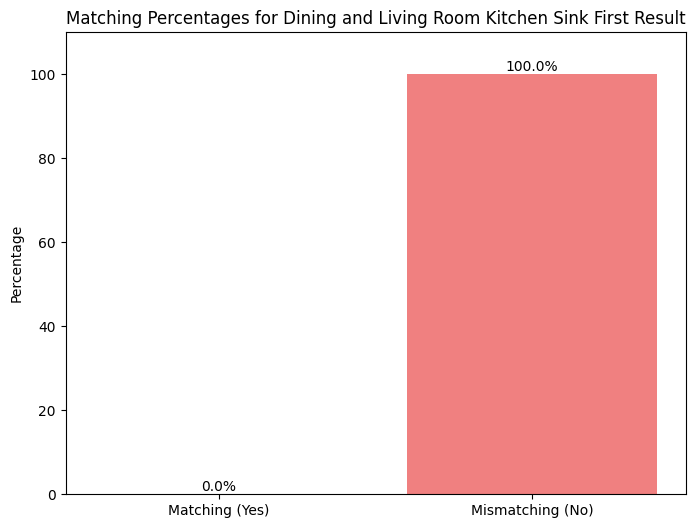

In [34]:
diningroom_sidedoor = [
    {'Audio': 'Kitchen Sink Dining Room', 'First': 'no', 'Second': 'no'},
    {'Audio': 'Kitchen Sink Living Room', 'First': 'no', 'Second': 'no'}
]

diningroom_sidedoor = pd.DataFrame(diningroom_sidedoor)

# Calculate the matching percentage
matching_percentage = (diningroom_sidedoor['First'] == 'yes').sum() / len(diningroom_sidedoor) * 100
mismatching_percentage = 100 - matching_percentage

# Create a bar chart for matching percentages
categories = ['Matching (Yes)', 'Mismatching (No)']
percentages = [matching_percentage, mismatching_percentage]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=colors)
plt.ylabel('Percentage')
plt.title('Matching Percentages for Dining and Living Room Kitchen Sink First Result')

# Add labels to the bars
for i, percentage in enumerate(percentages):
    plt.annotate(f'{percentage:.1f}%', (i, percentage), ha='center', va='bottom')

plt.ylim(0, 110)  # Set the y-axis limit from 0% to 100%

plt.show()

## Confidence in Match - Kitchen Sink Dining Room

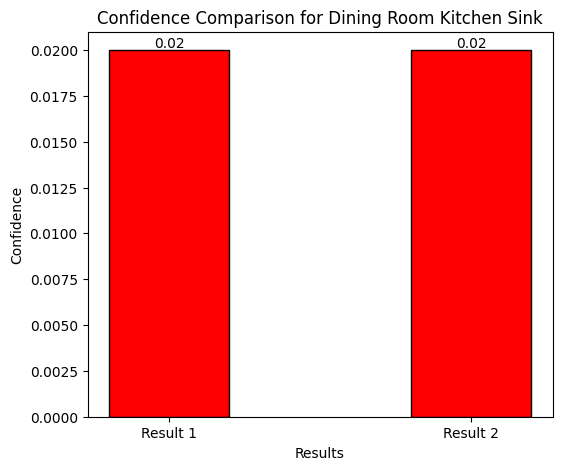

In [38]:
data = {'Result 1': 0.02, 'Result 2': 0.02}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Dining Room Kitchen Sink')

plt.show()

## Confidence in Match - Kitchen Sink Living Room

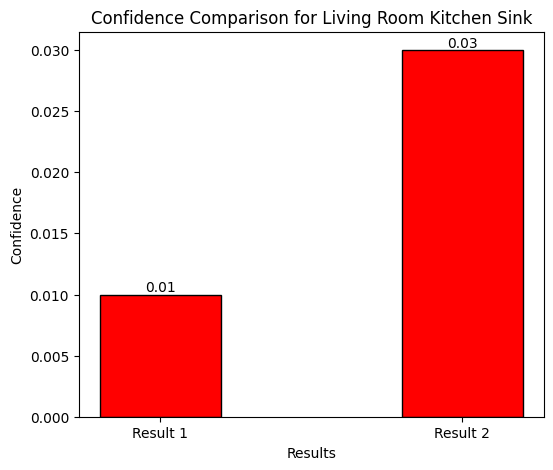

In [37]:
data = {'Result 1': 0.01, 'Result 2': 0.03}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Living Room Kitchen Sink')

plt.show()

## Confidence in Match - Kitchen Sink

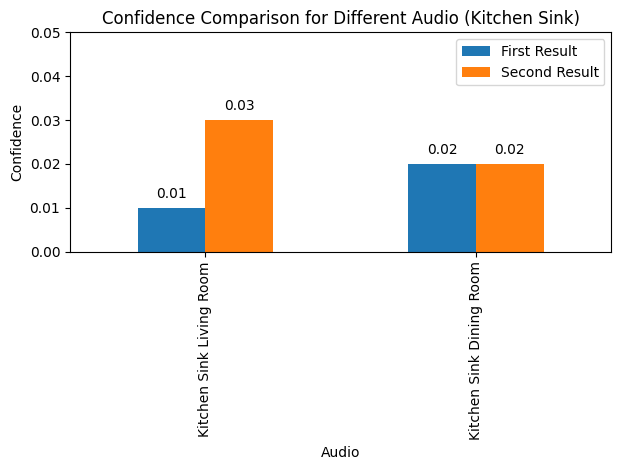

In [40]:
kitchensink_confidence = [
    {'Audio': 'Kitchen Sink Living Room', 'First Result': '0.01', 'Second Result': '0.03'},
    {'Audio': 'Kitchen Sink Dining Room', 'First Result': '0.02', 'Second Result': '0.02'}
]
kitchensink_confidence = pd.DataFrame(kitchensink_confidence)

# Convert the confidence columns to numeric
kitchensink_confidence['First Result'] = pd.to_numeric(kitchensink_confidence['First Result'])
kitchensink_confidence['Second Result'] = pd.to_numeric(kitchensink_confidence['Second Result'])

# Set the 'Audio' column as the index
kitchensink_confidence.set_index('Audio', inplace=True)

# Create a bar chart
ax = kitchensink_confidence.plot(kind='bar')
ax.set_ylabel('Confidence')
ax.set_title('Confidence Comparison for Different Audio (Kitchen Sink)')

# Adding confidence values above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

plt.ylim(0, 0.05)

# Display the bar chart
plt.show()

# Microwave - Living Room

In [41]:
microwaveaudio1 = djv.recognize(FileRecognizer,"/Users/allegrasimmons/Desktop/Household_Sounds_test/livingroom_microwave1tr4.wav")
microwaveaudio1

{'total_time': 0.3065369129180908,
 'fingerprint_time': 0.13388609886169434,
 'query_time': 0.15107369422912598,
 'align_time': 0.021136045455932617,
 'results': [{'song_id': 261,
   'song_name': b'livingroom_microwave1tr2',
   'input_total_hashes': 1128,
   'fingerprinted_hashes_in_db': 985,
   'hashes_matched_in_input': 31,
   'input_confidence': 0.03,
   'fingerprinted_confidence': 0.03,
   'offset': 20,
   'offset_seconds': 0.9288,
   'file_sha1': b'D68F9FCAD8D2D740D20C99A6B3147F61A4931F54'},
  {'song_id': 267,
   'song_name': b'livingroom_microwave1tr1',
   'input_total_hashes': 1128,
   'fingerprinted_hashes_in_db': 1049,
   'hashes_matched_in_input': 27,
   'input_confidence': 0.02,
   'fingerprinted_confidence': 0.03,
   'offset': 304,
   'offset_seconds': 14.11773,
   'file_sha1': b'965D70B83A6355A5DF8B04C05165D52722341E15'}]}

# Microwave - Dining Room

In [42]:
microwaveaudio2 = djv.recognize(FileRecognizer,"/Users/allegrasimmons/Desktop/Household_Sounds_test/microwave_diningroom1tr4.wav")
microwaveaudio2

{'total_time': 0.2014636993408203,
 'fingerprint_time': 0.15233278274536133,
 'query_time': 0.03826570510864258,
 'align_time': 0.010531902313232422,
 'results': [{'song_id': 281,
   'song_name': b'microwave_diningroom1tr3',
   'input_total_hashes': 793,
   'fingerprinted_hashes_in_db': 719,
   'hashes_matched_in_input': 16,
   'input_confidence': 0.02,
   'fingerprinted_confidence': 0.02,
   'offset': -407,
   'offset_seconds': -18.90104,
   'file_sha1': b'86F0D7345D5F25516C4E92D9B348529B54998D1D'},
  {'song_id': 282,
   'song_name': b'microwave_diningroom1tr2',
   'input_total_hashes': 793,
   'fingerprinted_hashes_in_db': 738,
   'hashes_matched_in_input': 9,
   'input_confidence': 0.01,
   'fingerprinted_confidence': 0.01,
   'offset': -56,
   'offset_seconds': -2.60063,
   'file_sha1': b'E60FBE14487C01CCC0CF985BB5C5D574CF0DE04C'}]}

## Matching Accuracy 

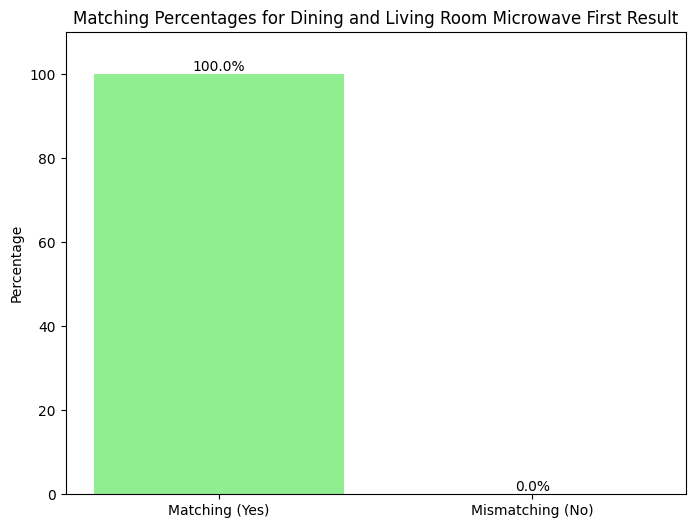

In [58]:
microwave = [
    {'Audio': 'Microwave Dining Room', 'First': 'yes', 'Second': 'yes'},
    {'Audio': 'Microwave Living Room', 'First': 'yes', 'Second': 'yes'}
]

microwave = pd.DataFrame(microwave)

# Calculate the matching percentage
matching_percentage = (microwave['First'] == 'yes').sum() / len(microwave) * 100
mismatching_percentage = 100 - matching_percentage

# Create a bar chart for matching percentages
categories = ['Matching (Yes)', 'Mismatching (No)']
percentages = [matching_percentage, mismatching_percentage]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=colors)
plt.ylabel('Percentage')
plt.title('Matching Percentages for Dining and Living Room Microwave First Result')

# Add labels to the bars
for i, percentage in enumerate(percentages):
    plt.annotate(f'{percentage:.1f}%', (i, percentage), ha='center', va='bottom')

plt.ylim(0, 110)  # Set the y-axis limit from 0% to 100%

plt.show()

## Confidence in Match - Microwave Dining Room

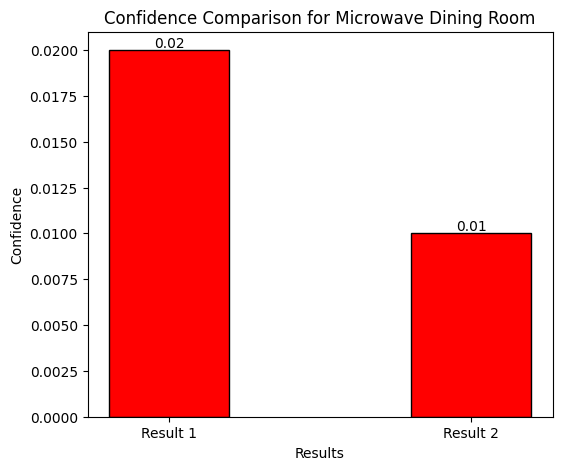

In [46]:
data = {'Result 1': 0.02, 'Result 2': 0.01}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Microwave Dining Room')

plt.show()

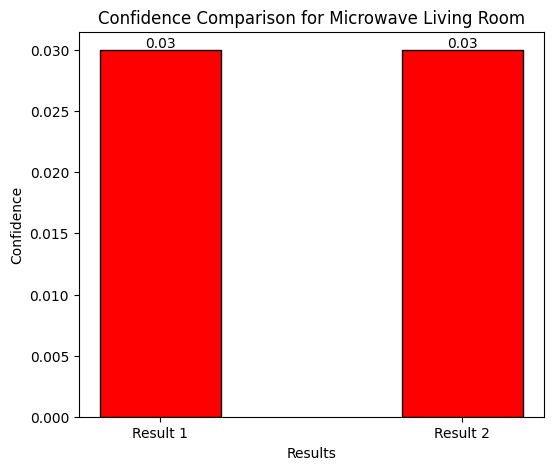

In [47]:
data = {'Result 1': 0.03, 'Result 2': 0.03}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Microwave Living Room')

plt.show()

## Confidence in Match - Microwave

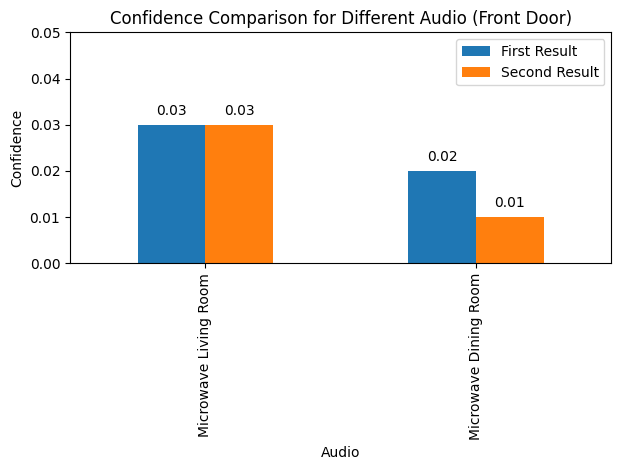

In [51]:
microwave_confidence = [
    {'Audio': 'Microwave Living Room', 'First Result': '0.03', 'Second Result': '0.03'},
    {'Audio': 'Microwave Dining Room', 'First Result': '0.02', 'Second Result': '0.01'}
]

microwave_confidence = pd.DataFrame(microwave_confidence)

# Convert the confidence columns to numeric
microwave_confidence['First Result'] = pd.to_numeric(microwave_confidence['First Result'])
microwave_confidence['Second Result'] = pd.to_numeric(microwave_confidence['Second Result'])

# Set the 'Audio' column as the index
microwave_confidence.set_index('Audio', inplace=True)

# Create a bar chart
ax = microwave_confidence.plot(kind='bar')
ax.set_ylabel('Confidence')
ax.set_title('Confidence Comparison for Different Audio (Microwave)')

# Adding confidence values above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

plt.ylim(0, .05)

# Display the bar chart
plt.show()

# Water - Dining Room

In [54]:
wateraudio2 = djv.recognize(FileRecognizer,"/Users/allegrasimmons/Desktop/Household_Sounds_test/water_diningroom1_trimmed3.wav")
wateraudio2

{'total_time': 0.13880610466003418,
 'fingerprint_time': 0.09790682792663574,
 'query_time': 0.024657011032104492,
 'align_time': 0.01593804359436035,
 'results': [{'song_id': 1,
   'song_name': b'Allegra-walkinghallwayrunningshoes2',
   'input_total_hashes': 46,
   'fingerprinted_hashes_in_db': 58,
   'hashes_matched_in_input': 3,
   'input_confidence': 0.07,
   'fingerprinted_confidence': 0.05,
   'offset': 131,
   'offset_seconds': 6.08363,
   'file_sha1': b'1990D60654F5A8C061B77565214CF4D87FD240DD'},
  {'song_id': 90,
   'song_name': b'14-nathaniel-walkingbarefootinhallway',
   'input_total_hashes': 46,
   'fingerprinted_hashes_in_db': 34,
   'hashes_matched_in_input': 4,
   'input_confidence': 0.09,
   'fingerprinted_confidence': 0.12,
   'offset': 112,
   'offset_seconds': 5.20127,
   'file_sha1': b'E75A5DEB20786D9403018059CF636D1FF587E196'}]}

# Water - Living Room

In [55]:
wateraudio1 = djv.recognize(FileRecognizer,"/Users/allegrasimmons/Desktop/Household_Sounds_test/water_livingroom1tr3.wav")
wateraudio1

{'total_time': 0.11844992637634277,
 'fingerprint_time': 0.08162403106689453,
 'query_time': 0.021420001983642578,
 'align_time': 0.015330791473388672,
 'results': [{'song_id': 112,
   'song_name': b'nathaniel-walkingbarefootinhallway',
   'input_total_hashes': 134,
   'fingerprinted_hashes_in_db': 882,
   'hashes_matched_in_input': 24,
   'input_confidence': 0.18,
   'fingerprinted_confidence': 0.03,
   'offset': 2416,
   'offset_seconds': 112.19882,
   'file_sha1': b'A3B0C0763B86D6107F0733A115B091FCDA477CEF'},
  {'song_id': 196,
   'song_name': b'fromlivingroom-openingbathroomdoor6',
   'input_total_hashes': 134,
   'fingerprinted_hashes_in_db': 121,
   'hashes_matched_in_input': 5,
   'input_confidence': 0.04,
   'fingerprinted_confidence': 0.04,
   'offset': 47,
   'offset_seconds': 2.18268,
   'file_sha1': b'4751A48884F8CEB4D53723262481DD807A70DA6C'}]}

## Matching Accuracy 

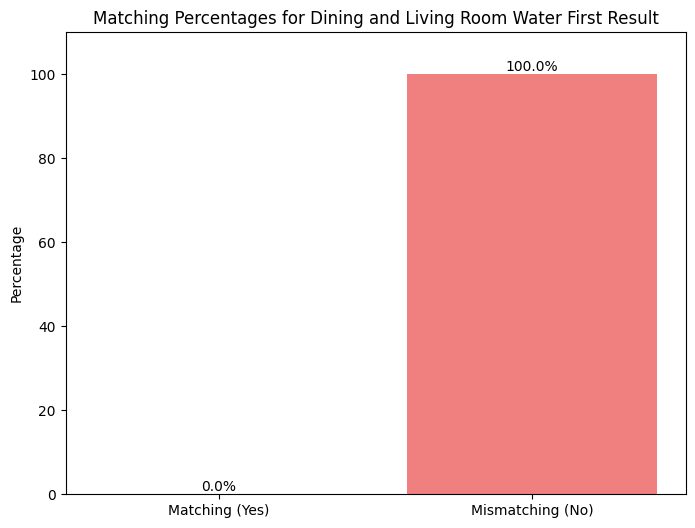

In [57]:
water = [
    {'Audio': 'Water Dining Room', 'First': 'no', 'Second': 'no'},
    {'Audio': 'Water Living Room', 'First': 'no', 'Second': 'no'}
]

water = pd.DataFrame(water)

# Calculate the matching percentage
matching_percentage = (water['First'] == 'yes').sum() / len(water) * 100
mismatching_percentage = 100 - matching_percentage

# Create a bar chart for matching percentages
categories = ['Matching (Yes)', 'Mismatching (No)']
percentages = [matching_percentage, mismatching_percentage]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=colors)
plt.ylabel('Percentage')
plt.title('Matching Percentages for Dining and Living Room Water First Result')

# Add labels to the bars
for i, percentage in enumerate(percentages):
    plt.annotate(f'{percentage:.1f}%', (i, percentage), ha='center', va='bottom')

plt.ylim(0, 110)  # Set the y-axis limit from 0% to 100%

plt.show()

## Confidence in Match - Water Living Room

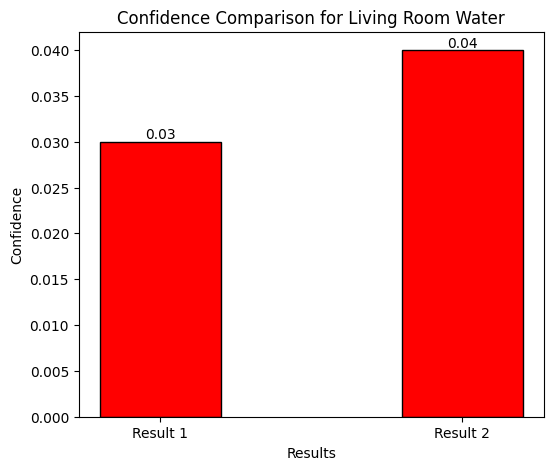

In [59]:
data = {'Result 1': 0.03, 'Result 2': 0.04}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Living Room Water')

plt.show()

## Confidence in Match - Water Dining Room

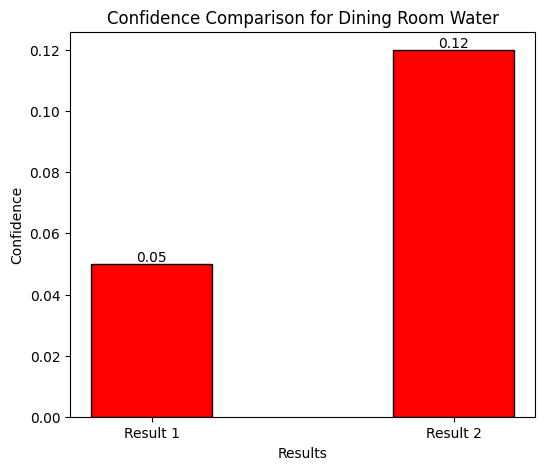

In [61]:
data = {'Result 1': 0.05, 'Result 2': 0.12}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Dining Room Water')

plt.show()

## Confidence in Match - Water

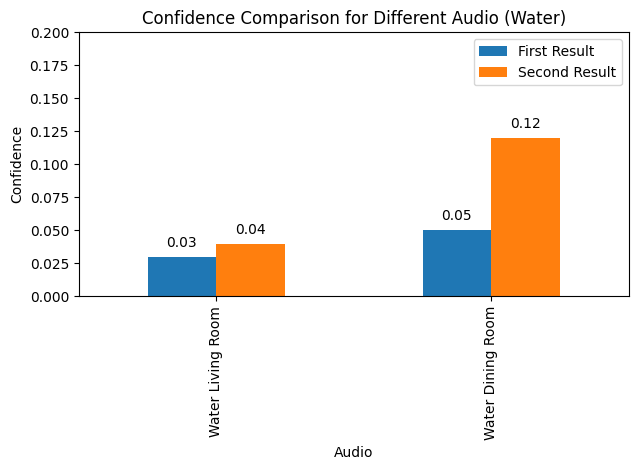

In [93]:
water_confidence = [
    {'Audio': 'Water Living Room', 'First Result': '0.03', 'Second Result': '0.04'},
    {'Audio': 'Water Dining Room', 'First Result': '0.05', 'Second Result': '0.12'}
]

water_confidence = pd.DataFrame(water_confidence)

# Convert the confidence columns to numeric
water_confidence['First Result'] = pd.to_numeric(water_confidence['First Result'])
water_confidence['Second Result'] = pd.to_numeric(water_confidence['Second Result'])

# Set the 'Audio' column as the index
water_confidence.set_index('Audio', inplace=True)

# Create a bar chart
ax = water_confidence.plot(kind='bar')
ax.set_ylabel('Confidence')
ax.set_title('Confidence Comparison for Different Audio (Water)')

# Adding confidence values above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

plt.ylim(0, .20)

# Display the bar chart
plt.show()

# Nathaniel Snoring

In [65]:
snoringaudio1 = djv.recognize(FileRecognizer,"/Users/allegrasimmons/Desktop/Household_Sounds_test/nathanielsnoring_diningroom1_test.wav")
snoringaudio1

{'total_time': 0.4883568286895752,
 'fingerprint_time': 0.3206658363342285,
 'query_time': 0.14907217025756836,
 'align_time': 0.018217086791992188,
 'results': [{'song_id': 305,
   'song_name': b'nathanielsnoring_diningroom2',
   'input_total_hashes': 344,
   'fingerprinted_hashes_in_db': 721,
   'hashes_matched_in_input': 320,
   'input_confidence': 0.93,
   'fingerprinted_confidence': 0.44,
   'offset': 1613,
   'offset_seconds': 74.90757,
   'file_sha1': b'EDA405FB3ACC486B88E605B8B0EC5B8308E58CE6'},
  {'song_id': 306,
   'song_name': b'nathanielsnoring_diningroom1',
   'input_total_hashes': 344,
   'fingerprinted_hashes_in_db': 721,
   'hashes_matched_in_input': 320,
   'input_confidence': 0.93,
   'fingerprinted_confidence': 0.44,
   'offset': 1613,
   'offset_seconds': 74.90757,
   'file_sha1': b'EDA405FB3ACC486B88E605B8B0EC5B8308E58CE6'}]}

## Matching Accuracy - Snoring

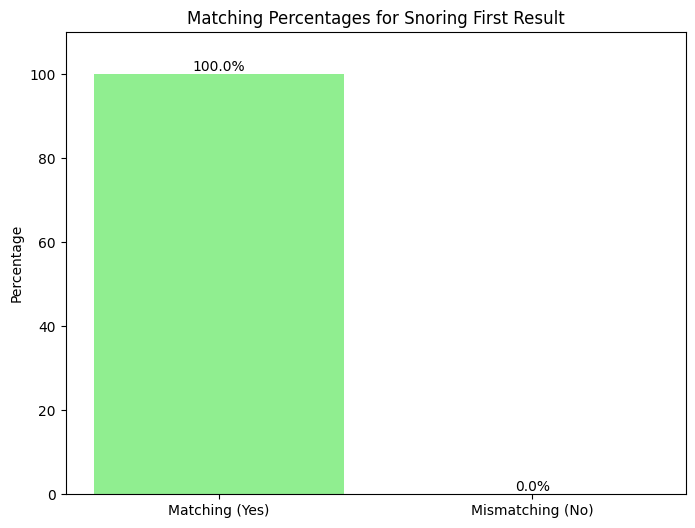

In [73]:
water = [
    {'Audio': 'Snoring Dining Room', 'First': 'yes', 'Second': 'yes'}
]

water = pd.DataFrame(water)

# Calculate the matching percentage
matching_percentage = (water['First'] == 'yes').sum() / len(water) * 100
mismatching_percentage = 100 - matching_percentage

# Create a bar chart for matching percentages
categories = ['Matching (Yes)', 'Mismatching (No)']
percentages = [matching_percentage, mismatching_percentage]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=colors)
plt.ylabel('Percentage')
plt.title('Matching Percentages for Snoring First Result')

# Add labels to the bars
for i, percentage in enumerate(percentages):
    plt.annotate(f'{percentage:.1f}%', (i, percentage), ha='center', va='bottom')

plt.ylim(0, 110)  # Set the y-axis limit from 0% to 100%

plt.show()

## Confidence in Match - Snoring

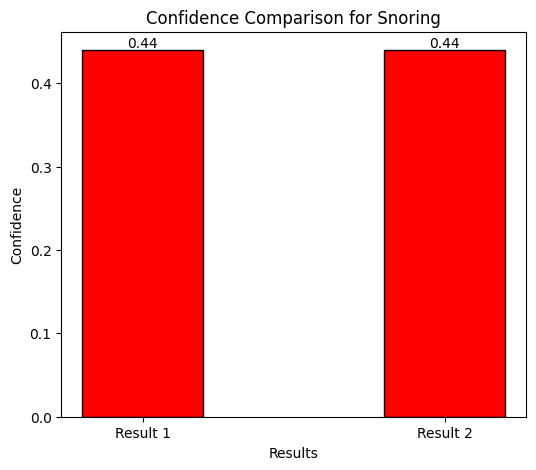

In [94]:
data = {'Result 1': 0.44, 'Result 2': 0.44}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Snoring')

plt.show()

# Talking

In [95]:
talkingaudio1 = djv.recognize(FileRecognizer,"/Users/allegrasimmons/Desktop/Household_Sounds_test/talkingindiningroom1test.wav")
talkingaudio1

{'total_time': 0.3152048587799072,
 'fingerprint_time': 0.1352686882019043,
 'query_time': 0.16507601737976074,
 'align_time': 0.014663219451904297,
 'results': [{'song_id': 308,
   'song_name': b'talkingindiningroom1',
   'input_total_hashes': 762,
   'fingerprinted_hashes_in_db': 3891,
   'hashes_matched_in_input': 242,
   'input_confidence': 0.32,
   'fingerprinted_confidence': 0.06,
   'offset': 700,
   'offset_seconds': 32.50794,
   'file_sha1': b'F5B25206ECBE62C677F8B8D9D7BB0F5A5776A60B'},
  {'song_id': 89,
   'song_name': b'9-nathaniel-walkingbarefootinhallway',
   'input_total_hashes': 762,
   'fingerprinted_hashes_in_db': 26,
   'hashes_matched_in_input': 3,
   'input_confidence': 0.0,
   'fingerprinted_confidence': 0.12,
   'offset': -217,
   'offset_seconds': -10.07746,
   'file_sha1': b'2B7B542ECF83B18FC7BB85B30E3D92070523DFEF'}]}

## Matching Accuracy - Talking

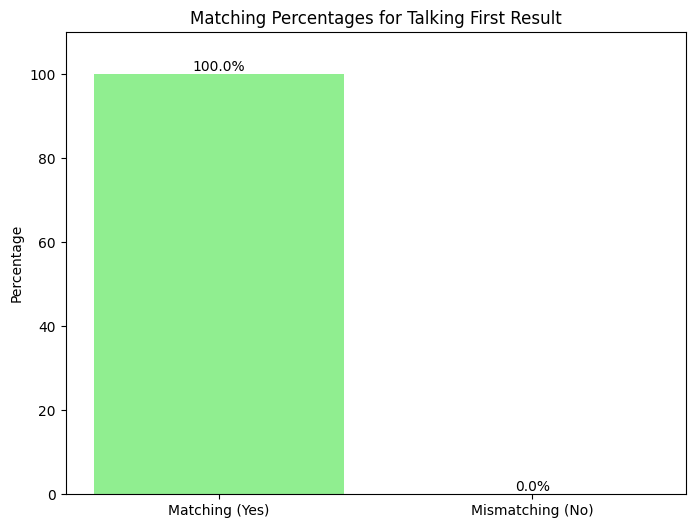

In [96]:
water1 = [
    {'Audio': 'Talking Dining Room', 'First': 'yes', 'Second': 'no'}
]

water1 = pd.DataFrame(water1)

# Calculate the matching percentage
matching_percentage = (water1['First'] == 'yes').sum() / len(water1) * 100
mismatching_percentage = 100 - matching_percentage

# Create a bar chart for matching percentages
categories = ['Matching (Yes)', 'Mismatching (No)']
percentages = [matching_percentage, mismatching_percentage]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=colors)
plt.ylabel('Percentage')
plt.title('Matching Percentages for Talking First Result')

# Add labels to the bars
for i, percentage in enumerate(percentages):
    plt.annotate(f'{percentage:.1f}%', (i, percentage), ha='center', va='bottom')

plt.ylim(0, 110)  # Set the y-axis limit from 0% to 100%

plt.show()

## Confidence in Match - Talking

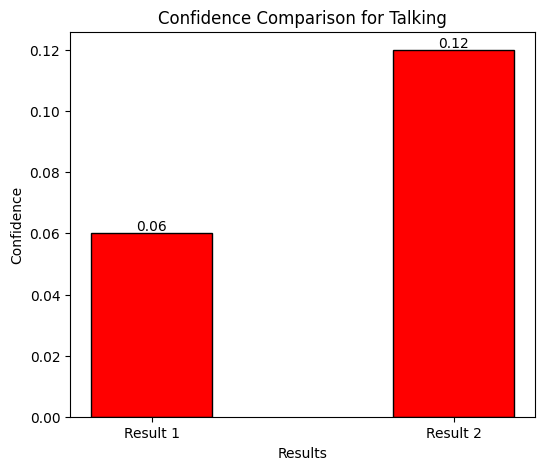

In [97]:
data = {'Result 1': 0.06, 'Result 2': 0.12}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Talking')

plt.show()

# Tea Kettle - Dining Room

In [98]:
teakettleaudio1 = djv.recognize(FileRecognizer,"/Users/allegrasimmons/Desktop/Household_Sounds_test/teakettle_diningroom(snoring)2_test.wav")
teakettleaudio1

{'total_time': 1.292165756225586,
 'fingerprint_time': 1.1716210842132568,
 'query_time': 0.06669306755065918,
 'align_time': 0.05308842658996582,
 'results': [{'song_id': 301,
   'song_name': b'teakettle_diningroom(snoring)1',
   'input_total_hashes': 1055,
   'fingerprinted_hashes_in_db': 1880,
   'hashes_matched_in_input': 1547,
   'input_confidence': 1.47,
   'fingerprinted_confidence': 0.82,
   'offset': 3591,
   'offset_seconds': 166.76571,
   'file_sha1': b'12F134979FF4DD2F8196A2961421E4411267F539'},
  {'song_id': 303,
   'song_name': b'teakettle_diningroom(snoring)2',
   'input_total_hashes': 1055,
   'fingerprinted_hashes_in_db': 1880,
   'hashes_matched_in_input': 1547,
   'input_confidence': 1.47,
   'fingerprinted_confidence': 0.82,
   'offset': 3591,
   'offset_seconds': 166.76571,
   'file_sha1': b'12F134979FF4DD2F8196A2961421E4411267F539'}]}

# Tea Kettle - Living Room

In [99]:
teakettleaudio2 = djv.recognize(FileRecognizer,"/Users/allegrasimmons/Desktop/Household_Sounds_test/teakettle_livingroom(snoring)1_test.wav")
teakettleaudio2

{'total_time': 1.0231029987335205,
 'fingerprint_time': 0.9309749603271484,
 'query_time': 0.04970407485961914,
 'align_time': 0.04156208038330078,
 'results': [{'song_id': 302,
   'song_name': b'teakettle_livingroom(snoring)1',
   'input_total_hashes': 735,
   'fingerprinted_hashes_in_db': 1736,
   'hashes_matched_in_input': 1031,
   'input_confidence': 1.4,
   'fingerprinted_confidence': 0.59,
   'offset': 4413,
   'offset_seconds': 204.93932,
   'file_sha1': b'7DFD5D0A5F2EC31C6E93ECAA190927BAE607ABC6'},
  {'song_id': 309,
   'song_name': b'teakettle_livingroom(snoring)2',
   'input_total_hashes': 735,
   'fingerprinted_hashes_in_db': 1736,
   'hashes_matched_in_input': 1031,
   'input_confidence': 1.4,
   'fingerprinted_confidence': 0.59,
   'offset': 4413,
   'offset_seconds': 204.93932,
   'file_sha1': b'7DFD5D0A5F2EC31C6E93ECAA190927BAE607ABC6'}]}

## Matching Accuracy - Tea Kettle 

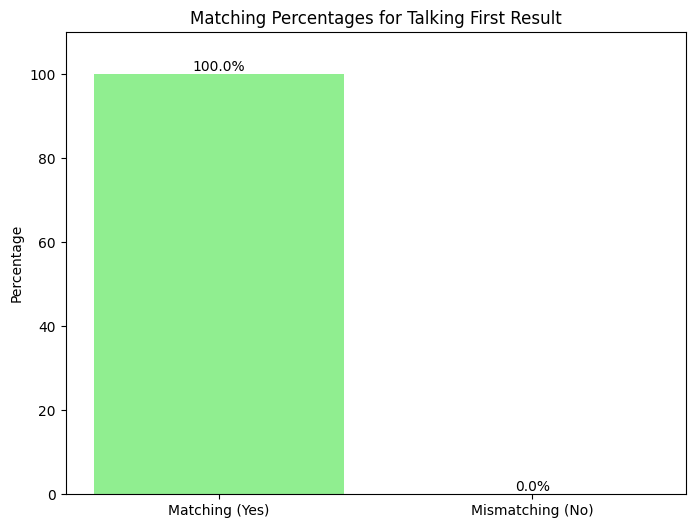

In [84]:
tea = [
    {'Audio': 'Tea Kettle Living Room', 'First': 'yes', 'Second': 'yes'},
    {'Audio': 'Tea Kettle Dining Room', 'First': 'yes', 'Second': 'yes'}
]

tea = pd.DataFrame(tea)

# Calculate the matching percentage
matching_percentage = (tea['First'] == 'yes').sum() / len(tea) * 100
mismatching_percentage = 100 - matching_percentage

# Create a bar chart for matching percentages
categories = ['Matching (Yes)', 'Mismatching (No)']
percentages = [matching_percentage, mismatching_percentage]
colors = ['lightgreen', 'lightcoral']

plt.figure(figsize=(8, 6))
plt.bar(categories, percentages, color=colors)
plt.ylabel('Percentage')
plt.title('Matching Percentages for Talking First Result')

# Add labels to the bars
for i, percentage in enumerate(percentages):
    plt.annotate(f'{percentage:.1f}%', (i, percentage), ha='center', va='bottom')

plt.ylim(0, 110)  # Set the y-axis limit from 0% to 100%

plt.show()

## Confidence in Match - Tea Kettle Dining Room

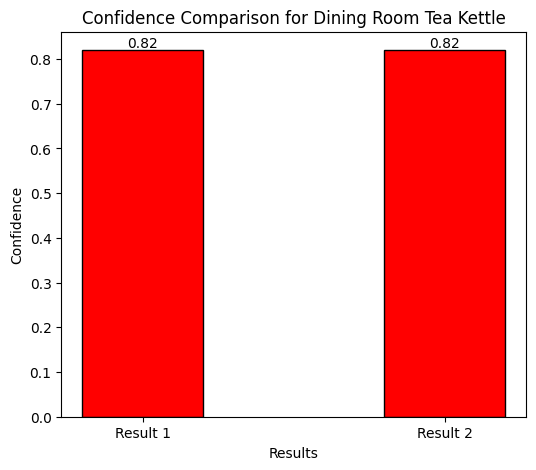

In [100]:
data = {'Result 1': 0.82, 'Result 2': 0.82}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Dining Room Tea Kettle')

plt.show()

## Confidence in Match - Tea Kettle Living Room

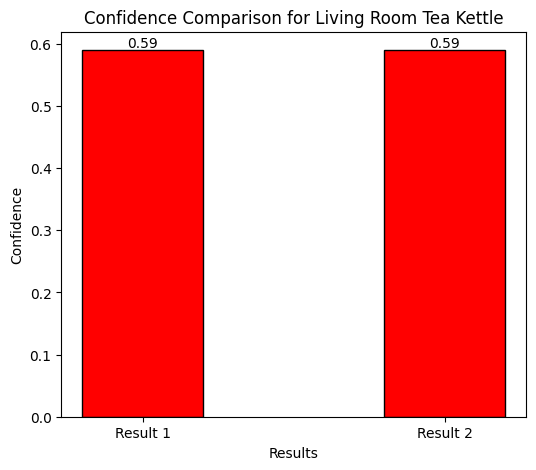

In [87]:
data = {'Result 1': 0.59, 'Result 2': 0.59}
songs = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111)

bars = plt.bar(songs, values, color='red', width=0.4, edgecolor='black')

# Adding result numbers to sit right on top of the bars
for bar, value in zip(bars, values):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(value), ha='center', va='bottom')

plt.xlabel('Results')
plt.ylabel('Confidence')
plt.title('Confidence Comparison for Living Room Tea Kettle')

plt.show()

## Confidence in Match - Tea Kettle

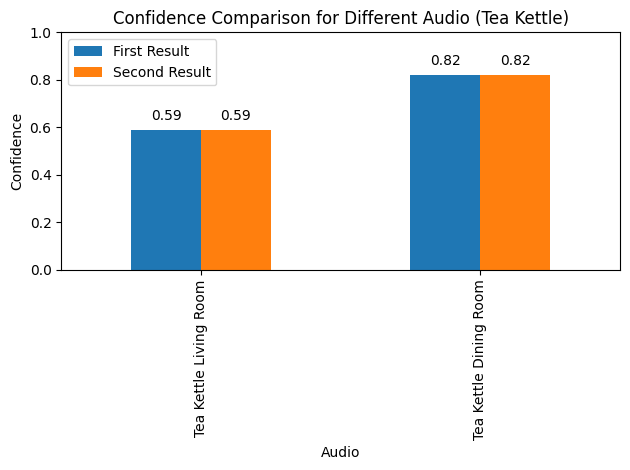

In [101]:
teakettle_confidence = [
    {'Audio': 'Tea Kettle Living Room', 'First Result': '0.59', 'Second Result': '0.59'},
    {'Audio': 'Tea Kettle Dining Room', 'First Result': '0.82', 'Second Result': '0.82'}
]

teakettle_confidence = pd.DataFrame(teakettle_confidence)

# Convert the confidence columns to numeric
teakettle_confidence['First Result'] = pd.to_numeric(teakettle_confidence['First Result'])
teakettle_confidence['Second Result'] = pd.to_numeric(teakettle_confidence['Second Result'])

# Set the 'Audio' column as the index
teakettle_confidence.set_index('Audio', inplace=True)

# Create a bar chart
ax = teakettle_confidence.plot(kind='bar')
ax.set_ylabel('Confidence')
ax.set_title('Confidence Comparison for Different Audio (Tea Kettle)')

# Adding confidence values above the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

plt.ylim(0, 1)

# Display the bar chart
plt.show()